# Regression Analysis: Parametric and Nonparametric Regression

## Overview

Machine learning can be summarized as learning a function (f) that maps input variables (X) to output variables (Y).

$$y = f(X)$$

In previous notebooks, we have discussed assumptions of linear regression models as well as the idea of regularization. You may think that it's difficult to actually know the best way to model the dataset you have on hand. For example, the function above is very simple and easy-to-understand. But it costs lots of time to try all the models, let alone the arguably infinite numbers of polynomial configuration you can try, and the job as machine learning practitioners is to evaluate different machine learning algorithms and see which is better at approximating the underlying function.

In this notebook, we will discuss **what parametric and nonparametric regressions are, and how nonparametric regression can help us get a robust model without even taking a look about the dataset**. We will also see why parametric regression is still useful in the face of nonparametric regression.

---

## Definition of Parametric vs Nonparametric Models

In statistics, **the term parametric is also associated with a specified probability distribution that you “assume” your data follows**. Each distribution comes with finite number of parameters (i.e. Gaussian Distribution has two variables, $\sigma$ and $\mu$), and the number of parameters is independent of the number of training data. Therefore, **`Parametric models`** are the models that assume some finite set of parameters $\theta$ for the regression model and have underlying assumptions for the distribution. No matter how much data you throw at a parametric model, it won’t change its mind about how many parameters it needs. In other words, **The complexity of the model is fixed for the parametric model even if the size of the data grows**. 





**`Nonparametric models`** are those that can have infinite set of parameters and are thus free to learn any functional form from the training data. This kind of model is good when you have a lot of data but no prior knowledge about it, and using nonparametric methods can avoid choosing the right distributon or assumptions for the data. **You can think of a non-parametric model as a “distribution-" or "assumption-" free model**. Since there's no limitations for the number of parameters (imposed by assuming distribution in parametric model), **nonparametric models can become more and more complex with an increasing amount of data**.

Examples for **`parametric models`** are **Linear Regression, Logistic Regression, Naive Bayes, and Linear Support Vector Machines**.

Examples for **`nonparametric models`** are **K-Nearest Neighbor, Gaussian Process, and Decision Trees**.

Note that some experts claim that **a precise and universally acceptable definition of the term `nonparametric` is not presently available** *(Handbook of nonparametric statistics, John E. Walsh, 1976)*. In this notebook, we will use the definition above the describe the term parametric and nonparametric.

<img src='pic/logit.png' width=300 height=300>

Logistic Regression is a parametric model, as the number of parameter is fixed and can be stated in a formula.

## Notebook Setting

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
np.set_printoptions(suppress=True)
pd.set_option("display.precision", 3)
sns.set(style="whitegrid", color_codes=True, font_scale=1)

Here we will use the famous Boston Housing Dataset.

In [163]:
from sklearn.datasets import load_boston

boston_dataset = load_boston()

boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['Target'] = boston_dataset.target
boston = boston[boston.columns[-1:].append(boston.columns[:-1])]
boston.head()

,Target,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.006,18.0,2.31,0.0,0.538,6.575,65.2,4.090,1.0,296.0,15.3,396.90,4.98
1,21.6,0.027,0.0,7.07,0.0,0.469,6.421,78.9,4.967,2.0,242.0,17.8,396.90,9.14
2,34.7,0.027,0.0,7.07,0.0,0.469,7.185,61.1,4.967,2.0,242.0,17.8,392.83,4.03
3,33.4,0.032,0.0,2.18,0.0,0.458,6.998,45.8,6.062,3.0,222.0,18.7,394.63,2.94
4,36.2,0.069,0.0,2.18,0.0,0.458,7.147,54.2,6.062,3.0,222.0,18.7,396.90,5.33


In [8]:
boston.isnull().values.any()

False

**No null value is detected. It's good to go!**

From better visualization results, here we will sample only `10 points` for regression and also keep one variable `LSTAT`.

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [164]:
# Normalize the data
scaler = StandardScaler()
boston_scaled = scaler.fit_transform(boston)
boston = pd.DataFrame(boston_scaled, columns=boston.columns)
boston_viz = boston.sample(10)[['Target','LSTAT']].reset_index(drop=True)

In [133]:
X = boston_viz.drop(columns=['Target'])
y = boston_viz['Target']

Also, we will use MSE as the loss function throughout this notebook.

In [216]:
def mse(pred, y_test):
    sum_err = 0.0
    y = y_test.values
    for i in range(len(y_test)):
        err = pred[i] - y[i]
        sum_err += (err**2)
    return(sum_err / float(len(pred)))

---

## Boston Housing Dataset with Parametric and Nonparametric model

In the following notebook, I'll use Ridge Regression to represent parametric models and Decision Tree to represent nonparametric model. There's no preference or reason why I choose them.

In [135]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

[-0.86855212] 0.05231870231575014


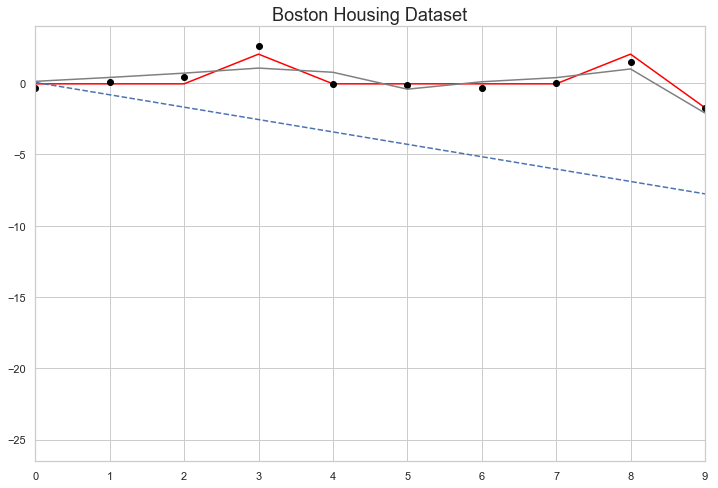

In [141]:
plt.figure(figsize=(12, 8))
clf = DecisionTreeRegressor(max_depth=2, max_leaf_nodes=3)
clf.fit(X, y)
y_pred = clf.predict(X)
pd.Series(y_pred).plot(color='red')
pd.Series(y).plot(marker="o", linewidth=0, color='black')
plt.title("Boston Housing Dataset", size=18)

clf = LinearRegression(normalize=True)
clf.fit(X, y)
y_pred = clf.predict(X)
pd.Series(y_pred).plot(color='gray')
print(clf.coef_, clf.intercept_)

plt.plot(np.arange(0,30), clf.coef_[0] * np.arange(0,30) + clf.intercept_, linestyle='--') # dashed

From the plot above we can see that nonparametric model (decision tree) fits better to the training data, and parametric model (linear regression) fits worse.

We can visulize the decision tree regressor by open-source library dtreeviz.

In [142]:
from dtreeviz.trees import dtreeviz

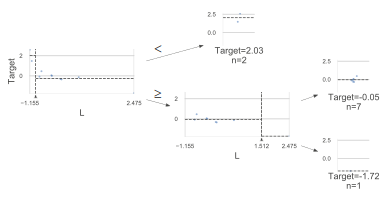

In [150]:
clf = DecisionTreeRegressor(max_depth=2, max_leaf_nodes=3)
clf.fit(X, y)
viz = dtreeviz(clf, 
               X, 
               y,
               target_name='Target',
               feature_names='LSTAT',
              orientation = 'LR')  
viz

By setting parameter **`max_depth = 2`** and **`max_leaf_nodes = 3`**, we are basically limiting how the model can strech to more complicated structure. Setting these parameters can also avoid the model to overfit the training data. 

Let's compare the two decision tree models, one no parameters stated and the other with parameters.

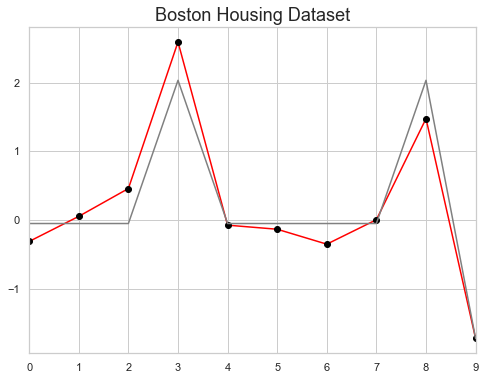

In [153]:
plt.figure(figsize=(8, 6))
clf = DecisionTreeRegressor()
clf.fit(X, y)
y_pred = clf.predict(X)
pd.Series(y_pred).plot(color='red')
pd.Series(y).plot(marker="o", linewidth=0, color='black')
plt.title("Boston Housing Dataset", size=18)

clf2 = DecisionTreeRegressor(max_depth=2, max_leaf_nodes=3)
clf2.fit(X, y)
y_pred = clf.predict(X)
pd.Series(y_pred).plot(color='gray')

We can clearly see that the one with no parameter set fit the data better (shown in red lines), whereas the model with max_depth and max_leaf_nodes set fits a little bit worse.

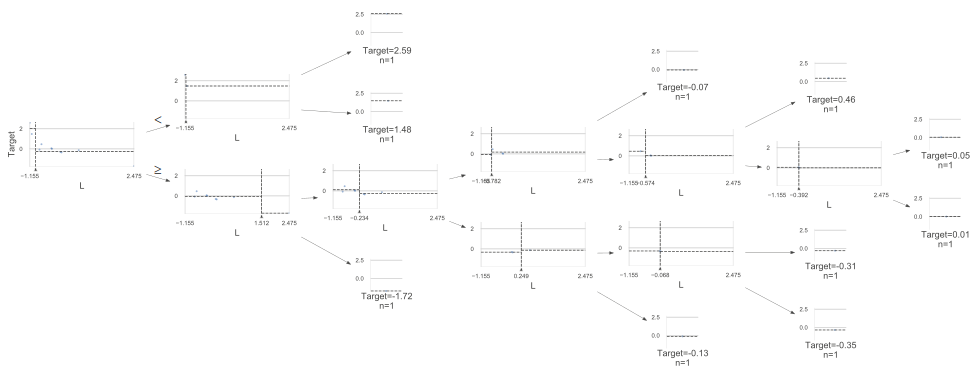

In [151]:
clf = DecisionTreeRegressor()
clf.fit(X, y)
viz = dtreeviz(clf, 
               X, 
               y,
               target_name='Target',
               feature_names='LSTAT',
              orientation = 'LR')  
viz

We can see that the tree continues to grow until it perfectly fits the training data. Although it may seam idea at first place, it sometimes leads to overfitting and will thus result in extremely high error.

In [209]:
from sklearn.model_selection import train_test_split

In [161]:
X = boston.drop(columns=['Target'])
y = boston['Target']

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [207]:
lin = LinearRegression()
lin.fit(X_train, y_train)
lin_pred = lin.predict(X_test)
mse(lin_pred, y_test)

22.3735444741607

In [215]:
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)
tree_pred = tree.predict(X_test)
mse(tree_pred, y_test)

16.505986842105273

Notice that there's a parameter `random_state` in DecisionTreeRegressor. 

As stated in the [documentation](https://scikit-learn.org/stable/modules/tree.html#tree), the problem of learning an optimal decision tree is known to be NP-complete. Consequently, **practical decision-tree learning algorithms are based on heuristic algorithms such as the greedy algorithm where locally optimal decisions are made at each node**. Such algorithms cannot guarantee to return the globally optimal decision tree. 

Therefore, the random_state parameter is used to fixed the result by setting the inital selection. We can mitigate this problem by introducing ensembled tree algorithms, **`RandomForestRegressor`** for example.

We can see that the Decision Tree Regressor outperforms Linear Regression, as the tree-based model can learn more complex model structure. It may also result in the ineffectiveness of fitting the boston housing dataset with a linear relationship using ordinary least squared methods. However, this may not be the case for other datasets.


## Advantages and disadvantages of parametric and nonparametric models

### Parametric Models

The advantage and disadvantage of parametric models can be summarized as below:

**Advantage**:

* **`Interpretability`**: Since the structure of model is known through the distribution, it's easier for machine learning practitioners to interpret the results.

* **`Speed`**: Given fixed model structure, it takes shorter time compared to nonparametric models since it doesn't need to try arguably infinite combination of model structures.

* **`Less Data Needed`**: Similarly since the model structure is fixed, it doesn't require too much training data for the result and can work well even the model doesn't fit the data pretty well.


**Disadvantage**:

* **`Constrained by model structure`**: As you choose the model structure you want to fit your data at the first place, your result will be constrained by the structure chosen and thus might be a poor fit to the data.

* **`Lower Complexity and (potential) Performance`**: As the number of parameters are chosen in advance, you lose the opportunity of letting your model discover potention structure while learning from you data, which results in lower complexity and thus (potential) lower performance.

---

### Non-parametric Models

The advantage and disadvantage of parametric models can be summarized as below:

**Advantage**:

* **`Flexibility`**: Since you don't need to impose any assumption to the model structure, you can extend the capacity of the model and fit a large number of data while capturing the underlying structure properly.

* **`Assumption-free`**: Unlike parametric methods that require prior knowledge about the dataset at hand, you need no assumptions (maybe weak assumptions) about the underlying structure of your model. 

* **`Genrally Better Performance`**: In general, one can achieve higher perfromance using nonparametric models. 

**Disadvantage**:

* **`More data required`**: As you don't impose distributions or assumptions to the model, it requires more data to capture the underlying structure that best fit your training data. 

* **`Slower`**: Since the number of parameters is unknown and the model is generally more complex, it takes more time to train a nonparametric model. (Also because more data is fed in.)

* **`Overfitting`**: One critical issue for nonparametric model is overfitting. As the model becomes more complex, it tends to capture more noise from the training data.

* **`Black-box`**: One of the biggest criticism about nonparametric model is that you sometimes end with a model that works pretty well at a given task, but is too complicated, almost "black-box"-ish and thus hard to interpret.

Note that nowadays more and more nonparametric model visualizer is created (i.e. the dtreeviz above). Therefore, **currently nonparametric models dominates parametric models in most of the use cases**.

## End Note

In this notebook, we do not dive into each of the different algorithms that can be used in regression. Here we simply want to illustrate the difference between parametric and nonparametric regression analysis. 

As what we've seen above, nonparametric regression model can outperform parametric regression model since it can learn more complex model structure. It may also come with the cost of overfitting. The topic of finding optimal parameters are another topic worth noticing and will be discussed in other notebooks.

In conclusion, we can summarize the comparison between parametric and nonparametric regression with the following.

For **`Parametric Regression`**, there's underlying assumptions and distributions declared, and thus the model structure will be fixed once we select the model. It will learn faster as the number of parameters are fixed, and it can also be interpreted better (as the example above we can use a line to illustrate the result from linear regression). However, the performance can be constrained by the model structure.

For **`Nonparametric Regression`**, there's no underlying assumptions and distributions made, and thus the model structure can become significantly complex as more data comes in. It generally outperforms parametric regression models, but it comes with the potentially risk of overfitting. This kind of model also requires more time in training, as it needs to learn the model structure from the data. Tuning parameters for nonparametric models is an important topic to strike a balance between overfitting and underfitting.

## Reference :

https://sebastianraschka.com/faq/docs/parametric_vs_nonparametric.html

https://www.quora.com/What-are-the-disadvantages-of-non-parametric-methods-in-machine-learning

https://www.kaggle.com/residentmario/non-parametric-regression

https://github.com/parrt/dtreeviz

https://stackoverflow.com/questions/39158003/confused-about-random-state-in-decision-tree-of-scikit-learn